# Análise: Video Game Sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Os dados referenciados podem ser encontrados <a href="https://www.kaggle.com/datasets/gregorut/videogamesales">neste link</a>. O dataset conta com informações sobre jogos que tiveram vendas acima de 100.000 cópias.

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Descrição de algumas colunas:
* NA_Sales: vendas na América do Norte
* EU_Sales: vendas na Europa
* JP_Sales: vendas no Japão
* Other_Sales: vendas no resto do mundo
* Global_Sales: total de vendas no mundo inteiro

O formato dos valores presentes nas colunas acima estão descritos em milhões de cópias de jogo vendidas.

### Limpeza dos dados

In [ ]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# preenchendo os valores vazios da coluna Publisher
df['Publisher'] = df['Publisher'].fillna('Unknown')

In [ ]:
# removendo a coluna Rank que não será utilizada na análise
df = df.dropna()
df = df.drop('Rank', axis=1)

In [ ]:
# transformando o tipo presente na coluna Year
df['Year'] = df['Year'].astype(int)

In [ ]:
# nesta análise trabalharemos apenas com os dados de 1980 até 2016
df = df[df['Year'] <= 2016]

### Análise Exploratória

In [ ]:
# visualizando o dataset após a limpeza dos dados

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# agrupando os dados em relação a quantidade de vendas por ano

global_sales_year = df['Global_Sales'].groupby(df['Year']).sum().reset_index()
global_sales_year.head()

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


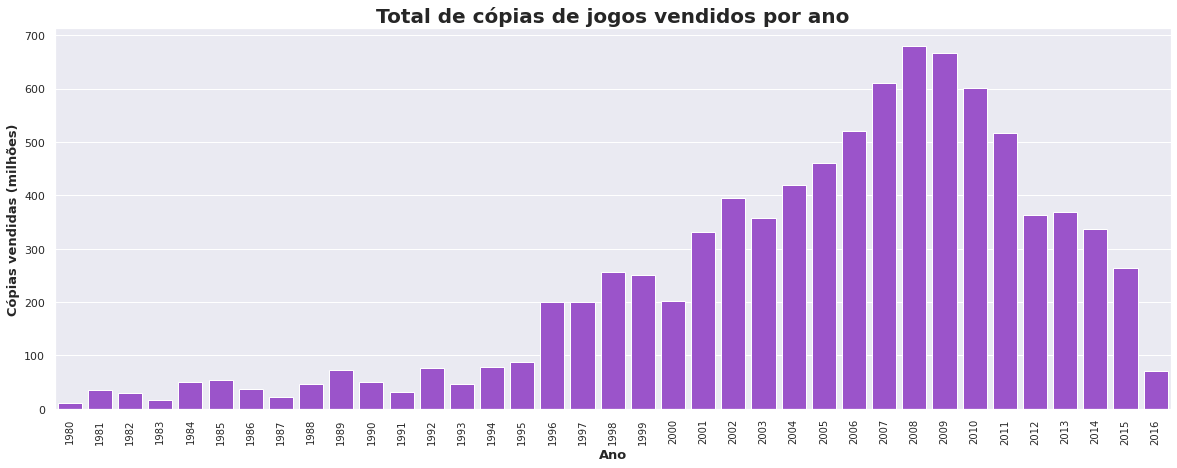

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=global_sales_year, x='Year', y='Global_Sales', palette=['#9F40DE'])
plt.title('Total de cópias de jogos vendidos por ano', fontsize=20, fontweight='bold')
plt.xlabel('Ano', fontsize=13, fontweight='bold')
plt.ylabel('Cópias vendidas (milhões)', fontsize=13, fontweight='bold')
plt.xticks(fontsize=10, rotation=90)
plt.show()

Como podemos ver no gráfico, 2008 foi o ano com o maior número de cópias de jogos vendidos (por volta de 700 milhões). Isso provavelmente se deu devido ao lançamento de grandes jogos no ano de 2008, como GTA IV, Super Smash Bros, Call of Duty: World at War, Mario Kart Wii, entre outros.

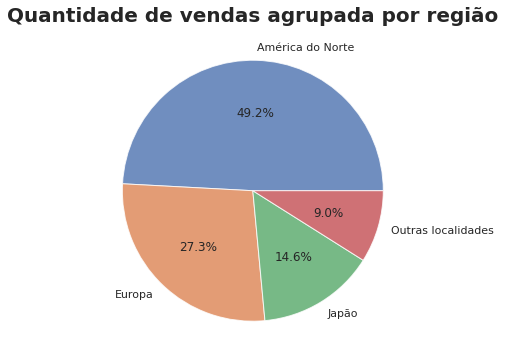

In [ ]:
data = [df['NA_Sales'].sum(), df['EU_Sales'].sum(), df['JP_Sales'].sum(), df['Other_Sales'].sum()]
labels = ['América do Norte', 'Europa', 'Japão', 'Outras localidades']
colors = sns.color_palette("deep")

sns.set(font_scale=1)
plt.figure(figsize=(6,6))
plt.pie(data, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'alpha':0.8})
plt.title('Quantidade de vendas agrupada por região', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
sales_by_region = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Year').sum().reset_index()
sales_by_region = pd.melt(sales_by_region, id_vars=['Year'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Area', value_name='Sale_Price')
sales_by_region = sales_by_region[sales_by_region['Year'] > 2005]
sales_by_region.head()

,Year,Area,Sale_Price
26,2006,NA_Sales,263.12
27,2007,NA_Sales,312.05
28,2008,NA_Sales,351.44
29,2009,NA_Sales,338.85
30,2010,NA_Sales,304.24


O gráfico abaixo mostra a quantidade de vendas de jogos por região em um determinado período e apenas em **2016** a América do Norte deixou de ser a região com o maior número de vendas. Ao mesmo tempo, o Japão e outras regiões tiveram um número próximo em quase todos os anos dentre o período analisado.

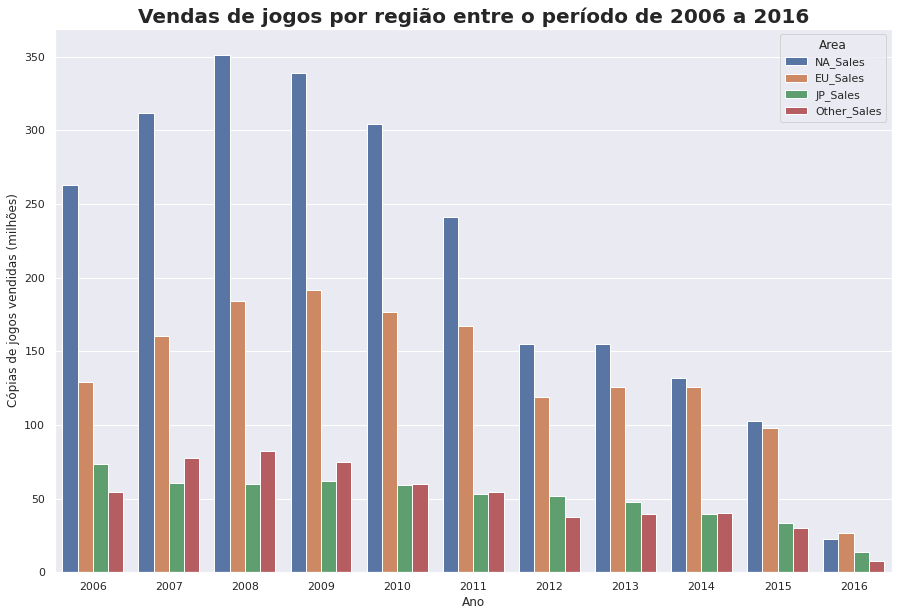

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1)
sns.barplot(x='Year', y='Sale_Price', hue='Area', data=sales_by_region)
#plt.legend(labels=['América do Norte', 'Europa', 'Japão', 'Outras localidades'], title='Área')
plt.title('Vendas de jogos por região entre o período de 2006 a 2016', fontsize=20, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Cópias de jogos vendidas (milhões)')
plt.show()

Os próximos cinco gráficos se referem aos títulos de jogos e o número de cópias vendidas. O primeiro gráfico é referente à quantidade no mundo inteiro e os demais focam nas vendas em uma determinada região.

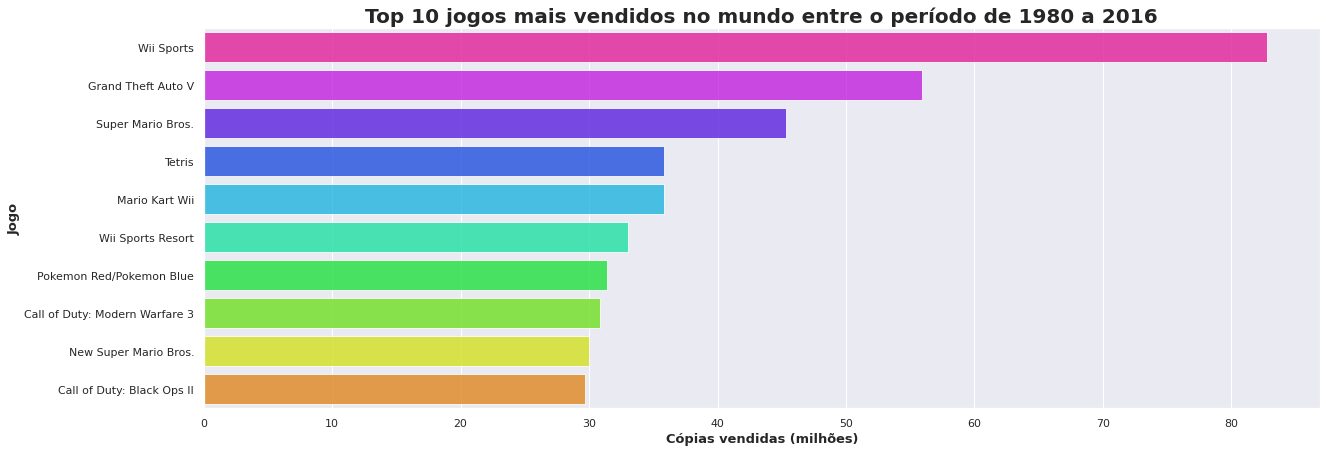

In [ ]:
most_sold_global = df.groupby('Name').sum().reset_index().sort_values('Global_Sales', ascending=False).head(10)

plt.figure(figsize=(20,7))
sns.barplot(data=most_sold_global, x='Global_Sales', y='Name', palette='hsv_r', alpha=0.8) #'hsv_r', 'gist_ncar_r', 'deep'
plt.title('Top 10 jogos mais vendidos no mundo entre o período de 1980 a 2016', fontsize=20, fontweight='bold')
plt.xlabel('Cópias vendidas (milhões)', fontsize=13, fontweight='bold')
plt.ylabel('Jogo', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

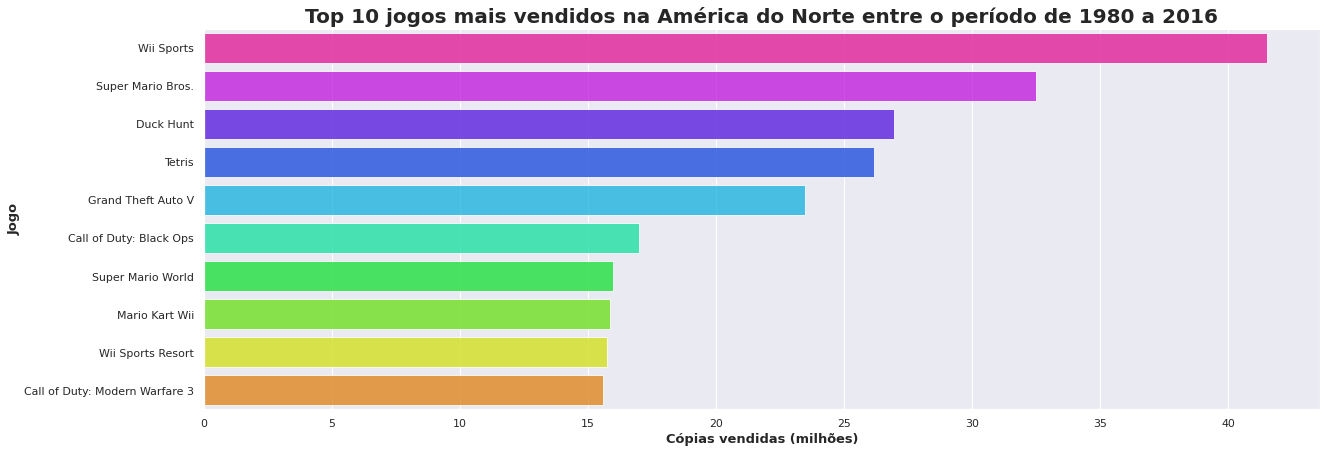

In [ ]:
most_sold_na = df.groupby('Name').sum().reset_index().sort_values('NA_Sales', ascending=False).head(10)

plt.figure(figsize=(20,7))
sns.barplot(data=most_sold_na, x='NA_Sales', y='Name', palette='hsv_r', alpha=0.8) #'hsv_r', 'gist_ncar_r'
plt.title('Top 10 jogos mais vendidos na América do Norte entre o período de 1980 a 2016', fontsize=20, fontweight='bold')
plt.xlabel('Cópias vendidas (milhões)', fontsize=13, fontweight='bold')
plt.ylabel('Jogo', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

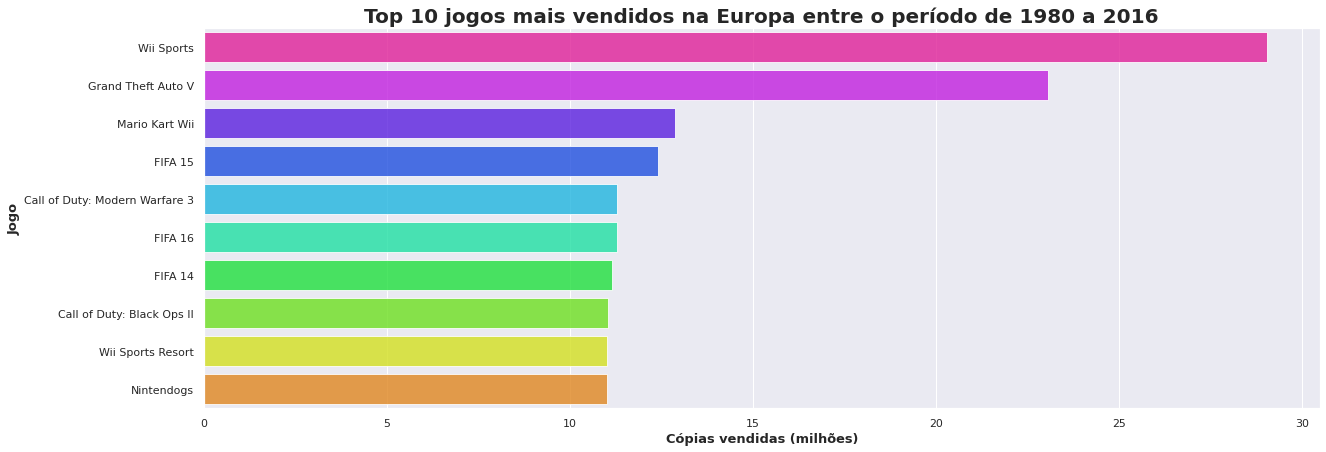

In [ ]:
most_sold_eu = df.groupby('Name').sum().reset_index().sort_values('EU_Sales', ascending=False).head(10)

plt.figure(figsize=(20,7))
sns.barplot(data=most_sold_eu, x='EU_Sales', y='Name', palette='hsv_r', alpha=0.8) #'hsv_r', 'gist_ncar_r'
plt.title('Top 10 jogos mais vendidos na Europa entre o período de 1980 a 2016', fontsize=20, fontweight='bold')
plt.xlabel('Cópias vendidas (milhões)', fontsize=13, fontweight='bold')
plt.ylabel('Jogo', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

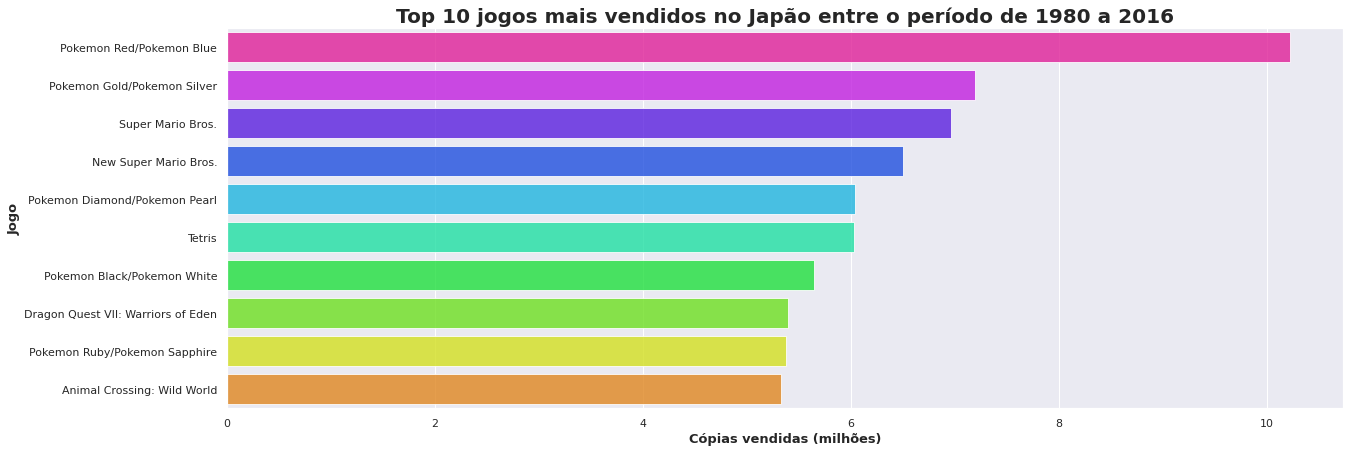

In [ ]:
most_sold_jp = df.groupby('Name').sum().reset_index().sort_values('JP_Sales', ascending=False).head(10)

plt.figure(figsize=(20,7))
sns.barplot(data=most_sold_jp, x='JP_Sales', y='Name', palette='hsv_r', alpha=0.8) #'hsv_r', 'gist_ncar_r'
plt.title('Top 10 jogos mais vendidos no Japão entre o período de 1980 a 2016', fontsize=20, fontweight='bold')
plt.xlabel('Cópias vendidas (milhões)', fontsize=13, fontweight='bold')
plt.ylabel('Jogo', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

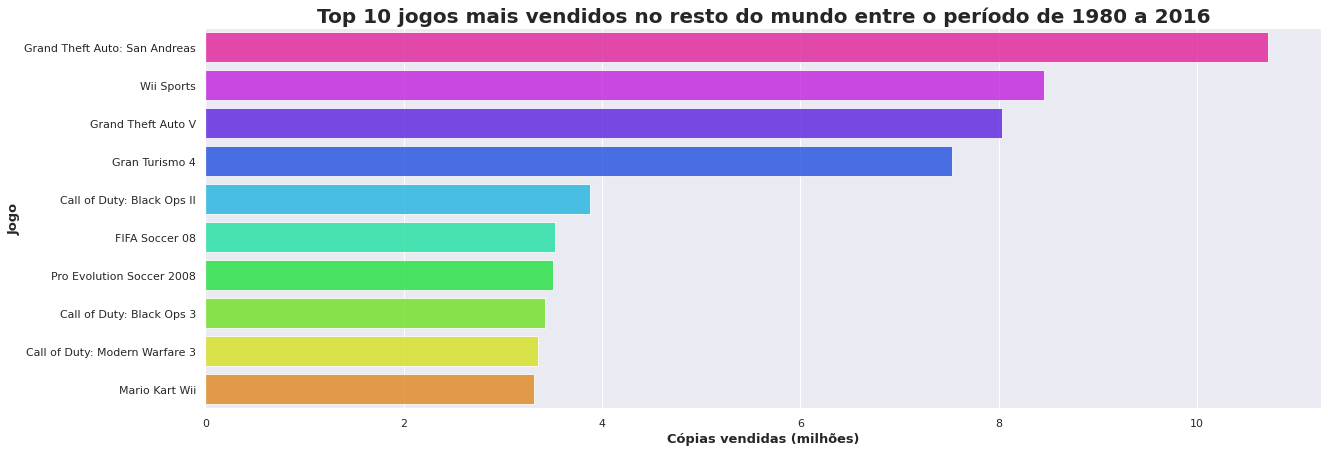

In [ ]:
most_sold_other = df.groupby('Name').sum().reset_index().sort_values('Other_Sales', ascending=False).head(10)

plt.figure(figsize=(20,7))
sns.barplot(data=most_sold_other, x='Other_Sales', y='Name', palette='hsv_r', alpha=0.8) #'hsv_r', 'gist_ncar_r'
plt.title('Top 10 jogos mais vendidos no resto do mundo entre o período de 1980 a 2016', fontsize=20, fontweight='bold')
plt.xlabel('Cópias vendidas (milhões)', fontsize=13, fontweight='bold')
plt.ylabel('Jogo', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

Os jogos que estavam presentes no top10 de várias localidades estão listados abaixo:

In [ ]:
pd.concat([most_sold_na, most_sold_eu, most_sold_jp, most_sold_other], ignore_index=True)['Name'].value_counts().head()

Wii Sports                        3
Mario Kart Wii                    3
Grand Theft Auto V                3
Call of Duty: Modern Warfare 3    3
Super Mario Bros.                 2
Name: Name, dtype: int64

Agora iremos analisar os gêneros de jogos que foram mais vendidos, sendo alguns dos gêneros presentes no dataset: ação, corrida, esportes, estratégia, entre outros.

In [ ]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
labels = {'Sports': 'Esportes', 'Platform': 'Plataforma', 'Misc': 'Diversos', 
          'Shooter': 'Tiro', 'Simulation': 'Simulação', 'Action': 'Ação', 
          'Fighting': 'Luta', 'Adventure': 'Aventura', 'Strategy': 'Estratégia'}

In [ ]:
sold_by_genre = df['Genre'].value_counts().rename_axis('Genre').reset_index(name='Count')
sold_by_genre['Genre'] = sold_by_genre['Genre'].map(lambda x: x if x not in labels else labels[x])

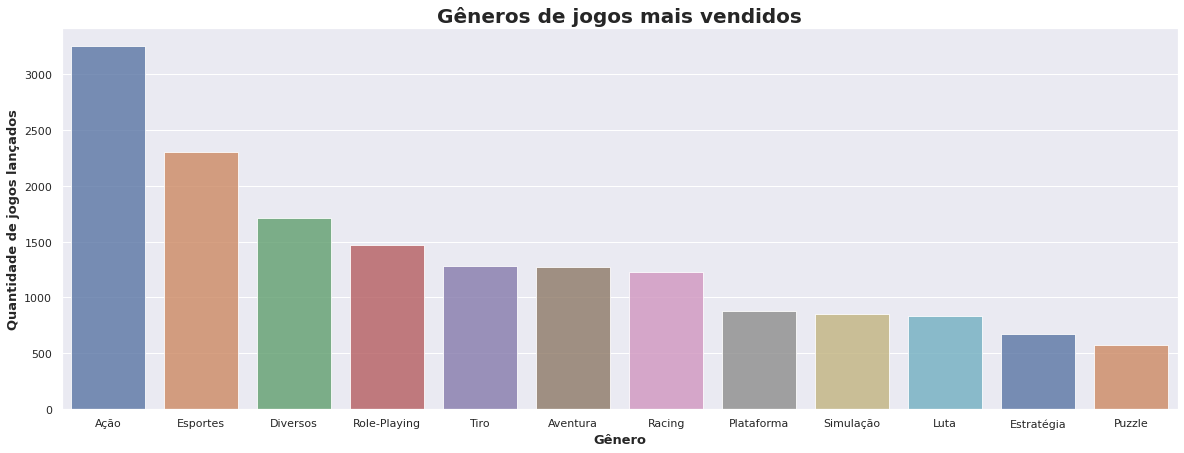

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=sold_by_genre, x='Genre', y='Count', palette='deep', alpha=0.8) #'hsv_r', 'gist_ncar_r'
plt.title('Gêneros de jogos mais vendidos', fontsize=20, fontweight='bold')
plt.xlabel('Gênero', fontsize=13, fontweight='bold')
plt.ylabel('Quantidade de jogos lançados', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [ ]:
genre_by_year = df.groupby(['Year', 'Genre'])['Name'].count().reset_index(name='Count')
genre_by_year = genre_by_year[genre_by_year.groupby('Year')['Count'].transform(max) == genre_by_year['Count']]
genre_by_year

,Year,Genre,Count
2,1980,Misc,4
5,1981,Action,25
12,1982,Action,18
19,1983,Action,7
29,1984,Puzzle,3
30,1984,Racing,3
31,1984,Shooter,3
35,1985,Platform,4
36,1985,Puzzle,4
40,1986,Action,6


Em 36 anos (1980 a 2016) o gênero mais vendido foi ação, líder de vendas em 19 anos, sendo 13 destes anos consecutivos (de 2003 a 2016).

In [ ]:
genre_by_year['Genre'].value_counts()

Action      19
Sports      12
Platform     5
Fighting     4
Puzzle       3
Shooter      2
Misc         1
Racing       1
Name: Genre, dtype: int64

No mapa de calor abaixo, temos uma relação dos gêneros de jogos e localidade. Novamente a América do Norte é a campeã em vendas de jogos de praticamente todos os gêneros, com a exceção do gênero *Role-Playing*, que foi mais vendido no Japão.

In [ ]:
genre_by_location = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Genre').sum()

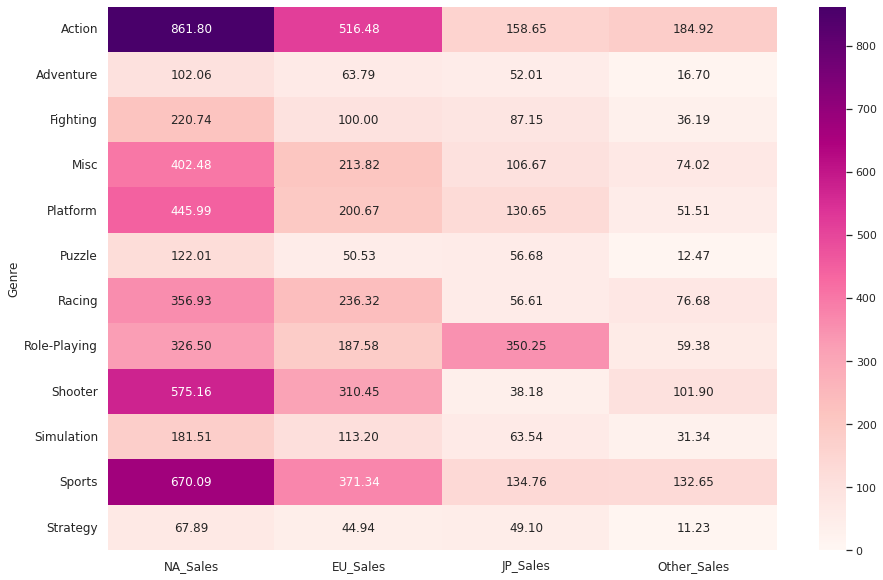

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(genre_by_location, cmap='RdPu', annot=True, fmt='.2f', vmin=0) #RdPu

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Temos, agora, visualizações relacionadas às vendas nas mais diversas plataformas. Nas próximas análises, o foco será voltado para as 10 plataformas com as maiores vendas.

In [ ]:
platforms = df.groupby('Platform').count()['Year'].reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

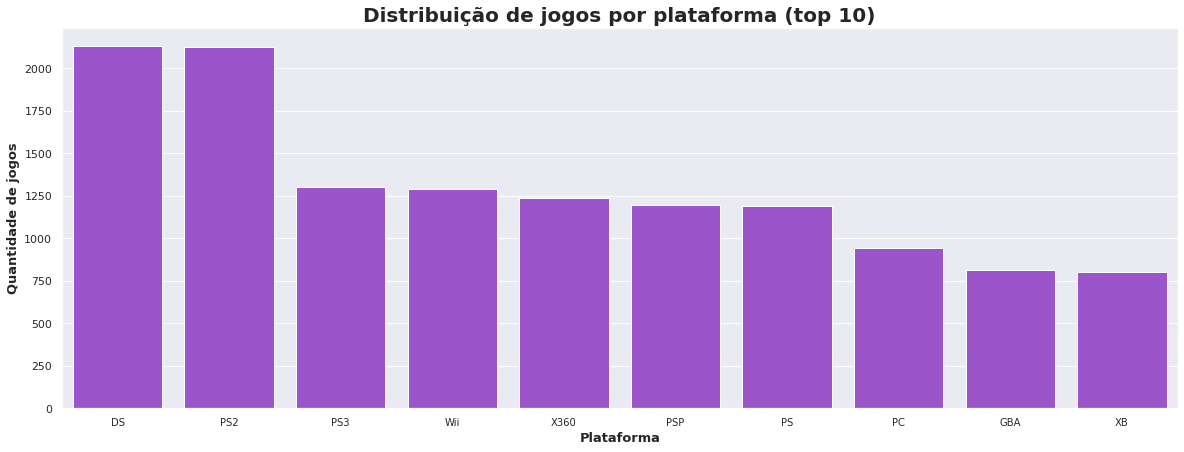

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=platforms, x='Platform', y='Count', palette=['#9F40DE'])
plt.title('Distribuição de jogos por plataforma (top 10)', fontsize=20, fontweight='bold')
plt.xlabel('Plataforma', fontsize=13, fontweight='bold')
plt.ylabel('Quantidade de jogos', fontsize=13, fontweight='bold')
plt.xticks(fontsize=10)
plt.show()

In [ ]:
platforms_by_region = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Platform').sum().reset_index()
platforms_by_region = pd.melt(platforms_by_region, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
platforms_by_region.sort_values('Sale_Price', ascending=False).head()

,Platform,Sale_Area,Sale_Price
28,X360,NA_Sales,594.33
16,PS2,NA_Sales,572.92
26,Wii,NA_Sales,497.37
17,PS3,NA_Sales,388.90
4,DS,NA_Sales,388.29


Abaixo é possível verificar a plataforma mais vendida em cada região e a quantidade de vendas (milhões):

In [ ]:
platforms_by_region = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Platform').sum()
pd.concat([platforms_by_region.idxmax(), platforms_by_region.max()], axis=1, keys=['Platform', 'Sale_Price'])

,Platform,Sale_Price
NA_Sales,X360,594.33
EU_Sales,PS3,340.47
JP_Sales,DS,175.02
Other_Sales,PS2,190.47
